In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys, pickle
from copy import deepcopy
import jp_analysis as analysis
from scipy import optimize

In [2]:
import jp_mpl as jplot

In [3]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))

### Loading the MC with GreyDisc

In [4]:
#gdisc_list = ['z0_baseline_3d',
#              'z0_baseline',
#              'z0_tdelay',
#              'z0_efficiency',
#              'z0_diffuse']
gdisc_list = ['z0_baseline_3d',
              'z0_baseline',
              'z0_baseline_runmc']
gdisc = {}

for gdisc_model in gdisc_list:
    gdisc_dir = '/home/jpyanez/rundir/laserball_greydisc/' + gdisc_model
    all_files = os.listdir(gdisc_dir)
    file_list = [os.path.join(gdisc_dir,x) for x in all_files if  'pckl' in x]

    print gdisc_model
    for iFile in range(len(file_list)):
        try:
            tmp_data = pickle.load(open(file_list[iFile]))
        except:
            print file_list[iFile]
            continue
        if iFile == 0:
            gdisc[gdisc_model] = deepcopy(tmp_data)
        else:
            gdisc[gdisc_model]['toa_map']+= tmp_data['toa_map']


z0_baseline_3d
z0_baseline
z0_baseline_runmc


In [35]:
data_dir = '/home/jpyanez/snoplus/data/SOC_files_reflections/'
run_nr = '102574'
all_files = os.listdir(data_dir)
file_list = [os.path.join(data_dir,x) for x in all_files if (run_nr in x and 'pckl' in x)]
for iFile in range(len(file_list)):
    tmp_data = pickle.load(open(file_list[iFile]))
    if iFile == 0:
        data = deepcopy(tmp_data)
    else:
        data['toa_map']+= tmp_data['toa_map']

In [36]:
print 'Mean occupancy', data['occupancy'][data['occupancy']>0].mean()

Mean occupancy 6717.25208834


[  2.44025292e+07   3.48882274e+02  -1.75428531e+00]
24561244.0
[  1.16139479e+06   3.89305378e+02   1.87474297e+00]
[  1.18079225e+07   3.89281457e+02   1.87365554e+00]
[  1.33496711e+05   3.89249705e+02   1.88774728e+00]


(1000, 100000000)

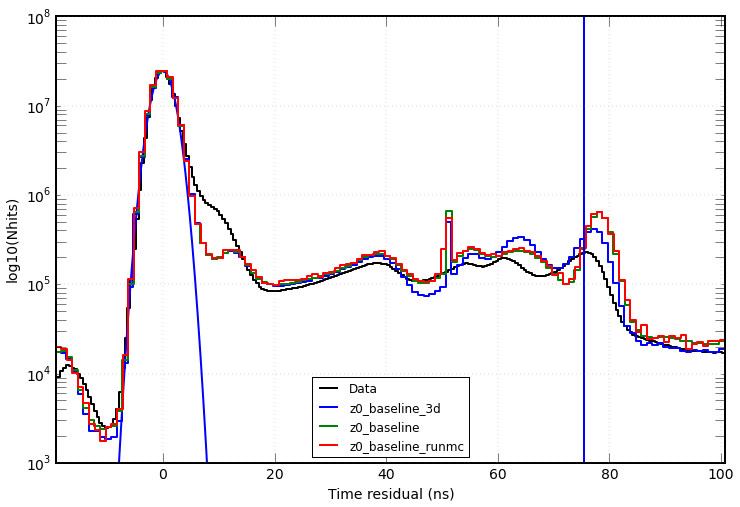

In [41]:
plt.figure()

data_toa = data['toa_map'].sum(axis=0)

plt.figure(figsize=(12,8))
data_center = data['time_edges'][data_toa.argmax()]

colors = ['b','g','r','c','m','y','sienna','olivedrab','navy','darkorange','teal']

ycenters = (data['time_edges'][1:] + data['time_edges'][:-1])/2.
tbool = (ycenters>(data_center-5))*(ycenters<(data_center+4))



# Try centering around zero
popt, pcov = optimize.curve_fit(analysis.gaus,
                                ycenters[tbool],
                                data_toa[tbool],
                                [10**7., data_center, 7.],
                                )
jplot.unfilledBar(data['time_edges']-popt[1], 
                  data_toa, 
                  label='Data',
                  color='k')

print popt



myx = np.linspace(data_center-10, data_center+10, 201)
plt.plot(myx-popt[1], analysis.gaus(myx, *popt))

themax = data_toa.max()
print themax
for i, gdisc_model in enumerate(gdisc_list):
    
    ycenters = (gdisc[gdisc_model]['time_edges'][1:] + gdisc[gdisc_model]['time_edges'][:-1])/2.
    tbool = (ycenters>385)*(ycenters<395.)
    # Try centering around zero
    popt, pcov = optimize.curve_fit(analysis.gaus,
                                    ycenters[tbool],
                                    gdisc[gdisc_model]['toa_map'].sum(axis=0)[tbool],
                                    [10**7., 390., 3.],
                                    )
    
        
    projection = gdisc[gdisc_model]['toa_map'].sum(axis=0)
    projection *= themax/projection.max()
    
    jplot.unfilledBar(gdisc[gdisc_model]['time_edges'] - popt[1], 
                      projection, 
                      label=gdisc_model,
                      color=colors[i])
    print popt
    
    





#plt.ylim([2., 6.5])
plt.legend(loc=0)
plt.xlabel('Time residual (ns)')
plt.ylabel('log10(Nhits)')
#plt.xlim([-10,10])
plt.axvline(x=75.5, ymin=0, ymax=7)
plt.yscale('log')
plt.ylim(10**3, 10**8)

[  2.44025292e+07   3.48882274e+02  -1.75428531e+00]
24561244.0
[  1.16139479e+06   3.89305378e+02   1.87474297e+00]
[  1.18079225e+07   3.89281457e+02   1.87365554e+00]
[  1.33496711e+05   3.89249705e+02   1.88774728e+00]


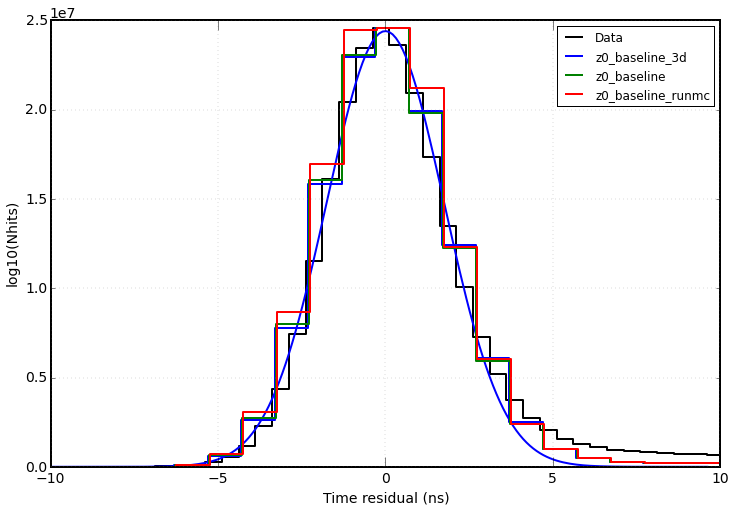

In [42]:
plt.figure()

data_toa = data['toa_map'].sum(axis=0)


plt.figure(figsize=(12,8))
data_center = data['time_edges'][data_toa.argmax()]

colors = ['b','g','r','c','m','y','sienna','olivedrab','navy','darkorange','teal']

ycenters = (data['time_edges'][1:] + data['time_edges'][:-1])/2.
tbool = (ycenters>(data_center-5))*(ycenters<(data_center+4))



# Try centering around zero
popt, pcov = optimize.curve_fit(analysis.gaus,
                                ycenters[tbool],
                                data_toa[tbool],
                                [10**7., data_center, 7.],
                                )
jplot.unfilledBar(data['time_edges']-popt[1], 
                  data_toa, 
                  label='Data',
                  color='k')

print popt



myx = np.linspace(data_center-10, data_center+10, 201)
plt.plot(myx-popt[1], analysis.gaus(myx, *popt))

themax = data_toa.max()
print themax
for i, gdisc_model in enumerate(gdisc_list):
    
    ycenters = (gdisc[gdisc_model]['time_edges'][1:] + gdisc[gdisc_model]['time_edges'][:-1])/2.
    tbool = (ycenters>385)*(ycenters<395.)
    # Try centering around zero
    popt, pcov = optimize.curve_fit(analysis.gaus,
                                    ycenters[tbool],
                                    gdisc[gdisc_model]['toa_map'].sum(axis=0)[tbool],
                                    [10**7., 390., 3.],
                                    )
    
        
    projection = gdisc[gdisc_model]['toa_map'].sum(axis=0)
    projection *= themax/projection.max()
    
    jplot.unfilledBar(gdisc[gdisc_model]['time_edges'] - popt[1], 
                      projection, 
                      label=gdisc_model,
                      color=colors[i])
    print popt
    
    





#plt.ylim([2., 6.5])
plt.legend(loc=0)
plt.xlabel('Time residual (ns)')
plt.ylabel('log10(Nhits)')
plt.xlim([-10,10])
plt.axvline(x=75.5, ymin=0, ymax=7)